<a href="https://colab.research.google.com/github/OMASWAL/Pytorch-Basics/blob/main/pytorchB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class Model(nn.Module):
  def __init__(self, in_features=4 ,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x




In [5]:
torch.manual_seed(41)
model = Model()


In [6]:
my_df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
my_df['species'] = my_df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
X = my_df.drop('species',axis=1).values
y = my_df['species'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [11]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f'epoch {i} loss {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 loss 1.125856637954712
epoch 10 loss 1.1099289655685425
epoch 20 loss 1.0973423719406128
epoch 30 loss 1.0869745016098022
epoch 40 loss 1.077682614326477
epoch 50 loss 1.0690053701400757
epoch 60 loss 1.0607118606567383
epoch 70 loss 1.052359938621521
epoch 80 loss 1.0425183773040771
epoch 90 loss 1.0311938524246216


Text(0.5, 0, 'Epoch')

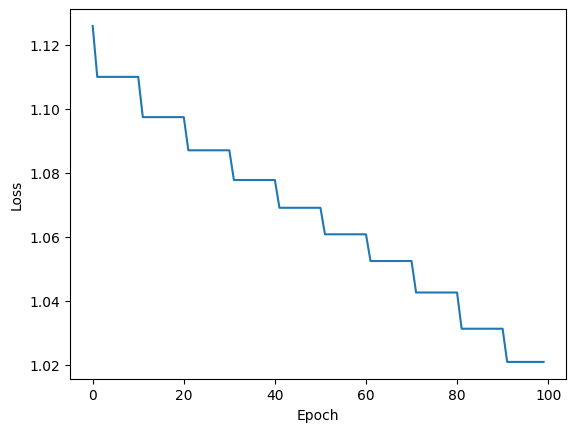

In [16]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [17]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [18]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.)  {str(y_val)}')

1.)  tensor([0.1747, 0.2460, 0.2981])
2.)  tensor([0.1636, 0.2302, 0.3783])
3.)  tensor([0.2609, 0.2871, 0.0610])
4.)  tensor([0.1646, 0.2290, 0.3821])
5.)  tensor([0.1789, 0.2187, 0.3839])
6.)  tensor([0.1734, 0.1773, 0.5608])
7.)  tensor([0.2568, 0.2821, 0.0784])
8.)  tensor([0.2589, 0.2799, 0.0986])
9.)  tensor([0.1689, 0.2041, 0.4599])
10.)  tensor([0.1608, 0.1818, 0.5671])
11.)  tensor([0.1658, 0.1779, 0.5716])
12.)  tensor([0.2651, 0.2948, 0.0310])
13.)  tensor([0.1749, 0.1797, 0.5550])
14.)  tensor([0.1680, 0.2338, 0.3503])
15.)  tensor([0.1544, 0.1938, 0.5395])
16.)  tensor([0.1685, 0.2381, 0.3410])
17.)  tensor([0.1721, 0.2183, 0.4108])
18.)  tensor([0.2626, 0.2786, 0.0970])
19.)  tensor([0.1625, 0.2243, 0.3957])
20.)  tensor([0.1526, 0.1935, 0.5174])
21.)  tensor([0.2673, 0.2868, 0.0591])
22.)  tensor([0.2546, 0.2674, 0.1498])
23.)  tensor([0.1734, 0.1845, 0.5365])
24.)  tensor([0.2686, 0.2896, 0.0484])
25.)  tensor([0.1782, 0.2284, 0.3630])
26.)  tensor([0.1682, 0.2190, 0.41